In [1]:
import json
import yaml
import os
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML
config = yaml.safe_load(open("/gscratch/balazinska/enhaoz/VOCAL-UDF/configs/config.yaml", "r"))

import re
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

In [20]:
def plot(dataset, udf_idx):
    methods = ["user", "gpt4v"]
    udfs = ["white", "green", "large", "red", "wooden", "yellow", "tall", "silver", "standing", "round"]
    udf = udfs[udf_idx]
    # Create a figure and axis for the boxplot
    fig, ax = plt.subplots(1, 1, figsize=(5, 2.7))  # Adjust the figsize as needed

    # plt.plot(x, np.sin(x), label = "curve 1")
    for i, method in enumerate(methods):
        if method == "user":
            x = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
            try:
                with open(os.path.join(config['log_dir'], "distill_model", dataset, f"labeling={method}-udf_idx={udf_idx}-ntrain_distill=1000.log"), "r") as f:
                    lines = f.readlines()
                f1_scores = []
                for line in lines:
                    if dataset == "vaw":
                        search_keyword = 'F1 score:'
                    elif dataset == "charades":
                        search_keyword = '[human-object only] F1 score:'
                    if search_keyword in line:
                        # Split the line to extract the F1 score
                        parts = line.split(search_keyword)
                        if len(parts) > 1:
                            # Clean the score and convert it to float
                            score = parts[1].strip()
                            f1_scores.append(float(score))
            except Exception as e:
                print(e)
                continue
            plt.plot(x, f1_scores, label=method, color=CB_color_cycle[i])
        else:
            x = [100, 200, 300, 400, 500]
            try:
                with open(os.path.join(config['log_dir'], "distill_model", dataset, f"labeling={method}-udf_idx={udf_idx}-ntrain_distill=500.log"), "r") as f:
                    lines = f.readlines()
                f1_scores = []
                for line in lines:
                    if dataset == "vaw":
                        search_keyword = 'F1 score:'
                    elif dataset == "charades":
                        search_keyword = '[human-object only] F1 score:'
                    if search_keyword in line:
                        # Split the line to extract the F1 score
                        parts = line.split(search_keyword)
                        if len(parts) > 1:
                            # Clean the score and convert it to float
                            score = parts[1].strip()
                            f1_scores.append(float(score))
            except Exception as e:
                print(e)
                continue
            plt.plot(x, f1_scores, label=method, color=CB_color_cycle[i])
    # Customize the plot labels and legend
    # ax.set_title(f"question_ids: {question_ids}")
    ax.set(ylabel="F1 Score")
    ax.set(xlabel="# samples")
    ax.set_ylim(bottom=0, top=1.05)
    ax.set_xlim(left=100)
    ax.set_xticks(list(range(100, 1100, 100)))
    ax.legend()
    # ax.set_xticklabels(num_new_udfs)
    # fig.legend(handles_f1, llm_model_labels, prop={"size": 10}, loc='upper center', bbox_to_anchor=(0.5, 0.07),
            #    fancybox=True, shadow=False, ncol=2)
    plt.subplots_adjust(bottom=0.15)
    fig.tight_layout()
    plt.show()

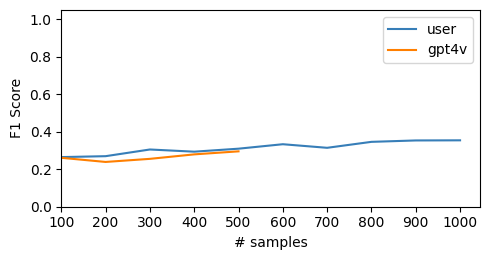

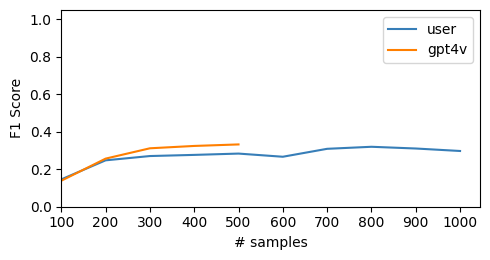

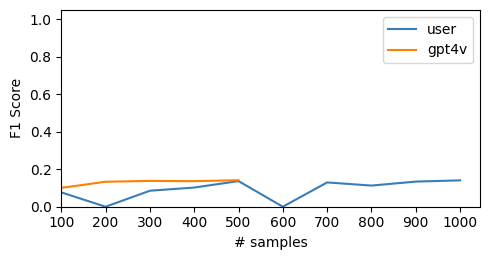

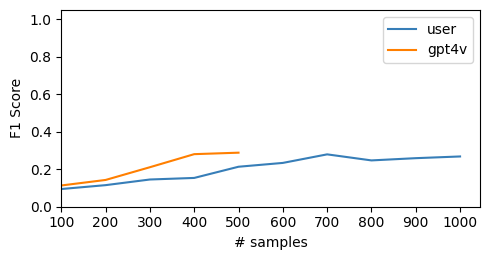

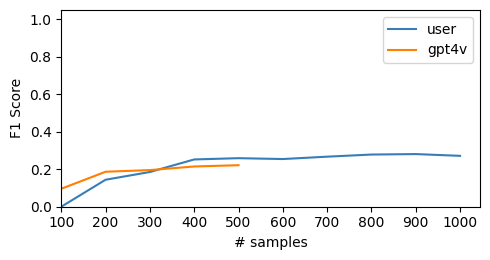

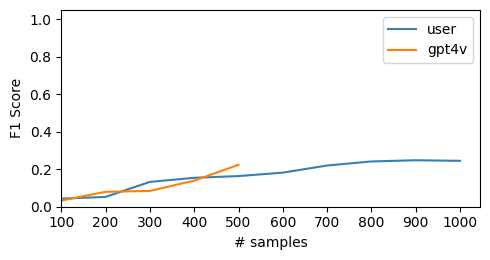

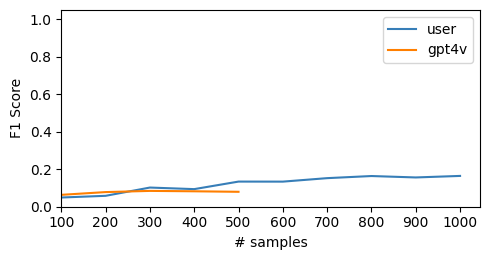

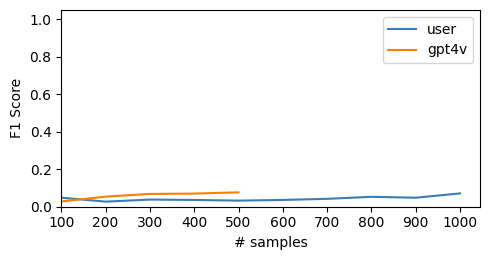

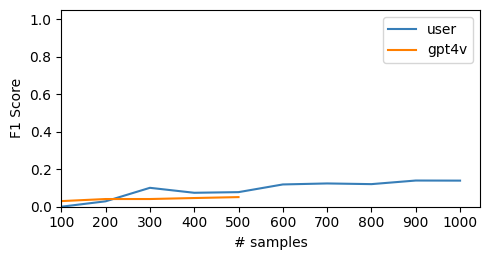

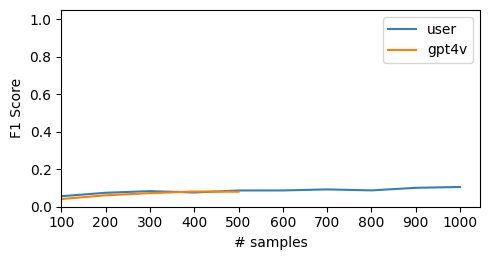

In [18]:
for i in range(10):
    plot("vaw", i)

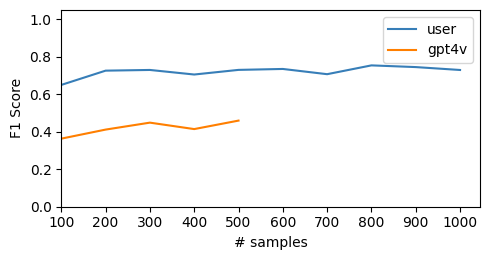

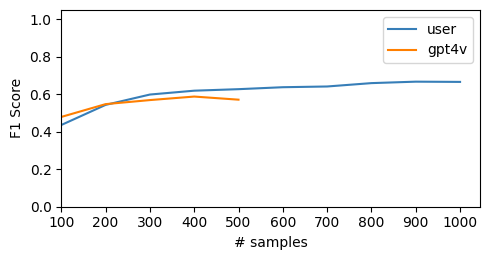

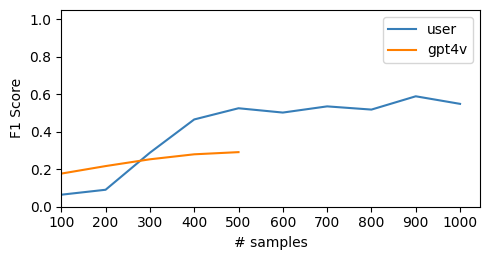

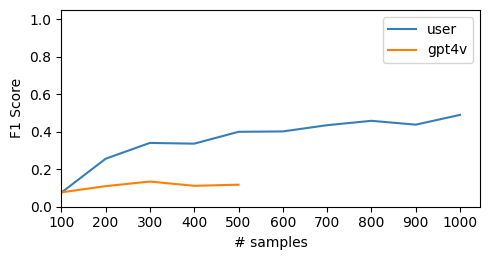

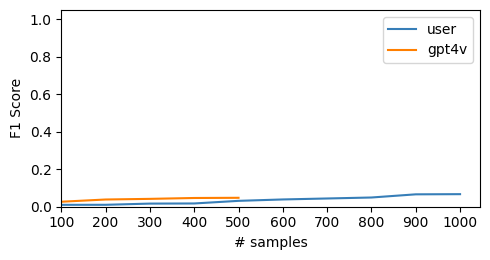

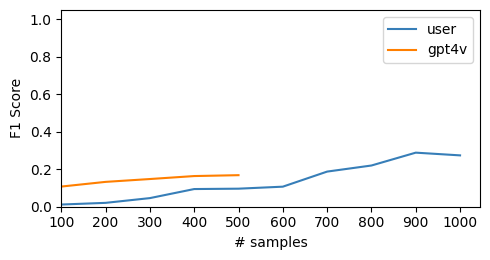

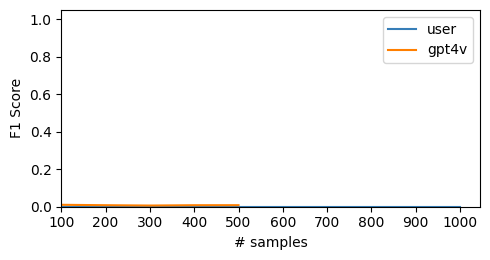

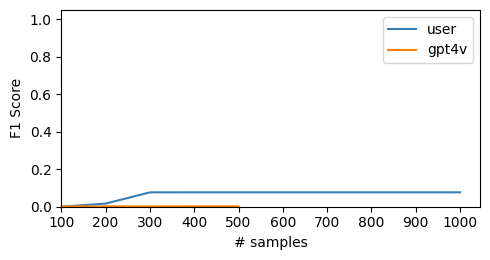

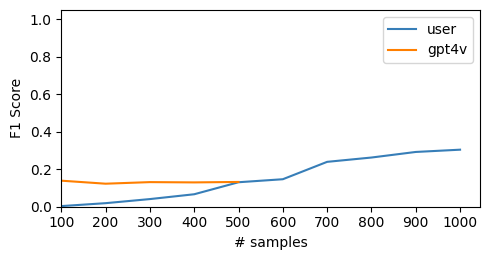

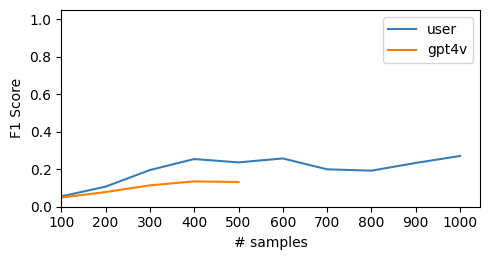

In [21]:
for i in range(10):
    plot("charades", i)